## Assignment \#1 : Estimating the Distance to the Pleiades

Pleiades is an open star cluster located at approximately $(RA, \, DEC)_{2000} = (3h47m, +24^\circ 03')$ and approximately $450 \, [ly]$ ($\simeq 4\times 10^{15} \, [km]$) away. The goal of this assignment is to estimate the distance to this cluster using a sample from the Hipparcos catalog.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

___
## Retrieving Data from the Hipparcos Catalog

The recent Hipparcos catalog (I/311) is available on Vizier, located [here](http://cdsarc.u-strasbg.fr/viz-bin/VizieR?-meta.foot&-source=I/311). We will extract the data automatically using the _astroquery_ library&mdash;an _astropy_ affilited package&mdash; which can be used to access online astronomical data.

In [2]:
from astroquery.vizier import Vizier
catalog_list = Vizier.find_catalogs('I/311')

print({k:v.description for k,v in catalog_list.items()})

Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list.keys())

{'I/311': 'Hipparcos, the New Reduction (van Leeuwen, 2007)'}


Searching for the Pleiades in the catalog

In [3]:
from astropy.coordinates import Angle

# Only extract the following quantities
v = Vizier(columns=['HIP', 'RArad','DErad', 'Plx', 'e_Plx', 'pmRA', 'pmDE', 'B-V', 'V-I', 'Hpmag', 'e_Hpmag'])
       
# Query the catalog around Pleiades with a search radius of 2 degrees
result = v.query_region("Pleiades", radius=Angle(2.0, "deg"), catalog="I/311/")

df = result['I/311/hip2'].to_pandas()

In [4]:
print(f"{len(df.index)} Stars Retrieved...")

# The Parallax (Plx) is given in milli-arcsecond, so let us convert it to arcseconds.
df.Plx = df.Plx / (10e-3)
df.e_Plx = df.e_Plx / (10e-3)

df.head()

47 Stars Retrieved...


,HIP,RArad,DErad,Plx,e_Plx,pmRA,pmDE,B-V,V-I,Hpmag,e_Hpmag
0,16996.0,54.649570,24.601687,896.0,107.000008,3.47,-22.69,0.428,0.50,8.3007,0.0012
1,17020.0,54.736883,24.569915,298.0,275.000000,21.24,-44.93,0.645,0.71,10.6845,0.0041
2,17034.0,54.777958,24.702983,832.0,79.000008,23.91,-45.11,0.039,0.05,7.1287,0.0008
3,17044.0,54.806084,24.466631,1019.0,219.000015,23.24,-43.11,0.616,0.68,10.5328,0.0040
4,17091.0,54.921506,23.290987,1182.0,194.000015,26.82,-44.23,0.608,0.68,10.0767,0.0050


## Visual Inspection of the Data

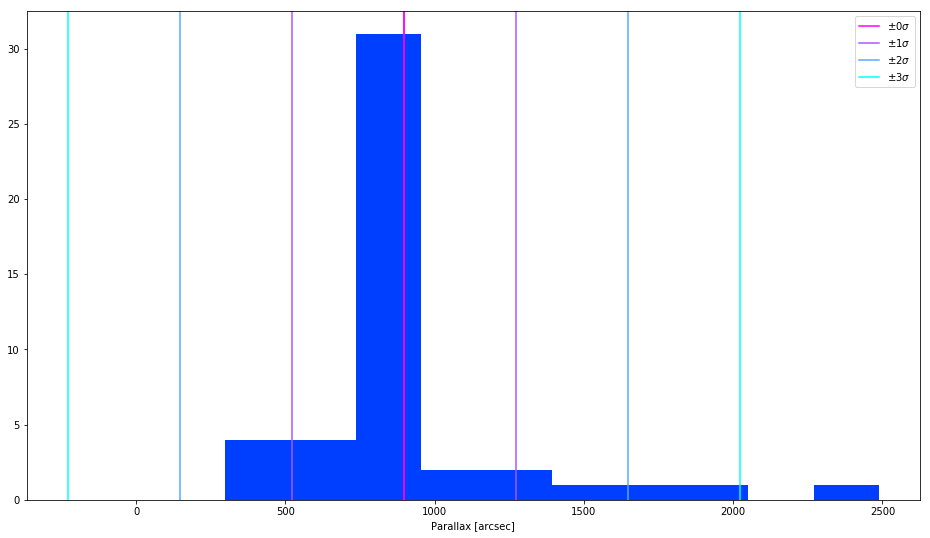

Mean Distance = 1.11e-03 [pc]


In [8]:
fig = plt.figure(figsize=(16,9))

mean = df.Plx.mean()
std = df.Plx.std()

plt.hist(df.Plx)

for i, color in enumerate(plt.cm.cool(np.linspace(1, 0, 4))):
    plt.axvline(mean + (i)*std, color=color, label=f'$\pm {i}\sigma$')
    plt.axvline(mean - (i)*std, color=color)

plt.xlabel('Parallax [arcsec]')
plt.legend(loc='best')
plt.show()

print(f"Mean Distance = {'{:.2e}'.format(1/mean)} [pc]")

As we can see, there are a spread of Parallax measurements, which is indicative of contaimination from foreground (or background) stars.

___
## Color-Magnitude Diagram

Here we plot a color-magnitude diagram for the Pleiades members with the parallax represeted by color.

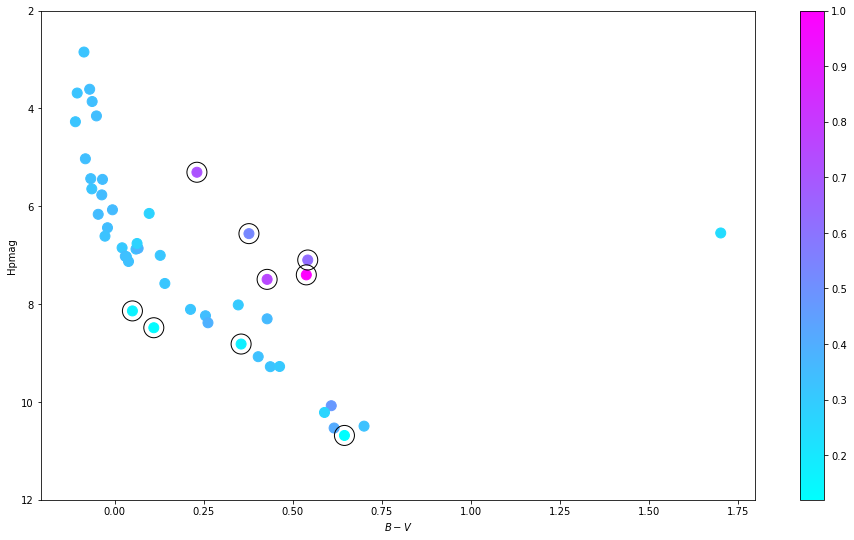

In [156]:
fig = plt.figure(figsize=(16,9))
trim_df = df[(df.Plx > mean+std) | (df.Plx < mean - std)]

plt.scatter(df["B-V"], df.Hpmag, c=df.Plx/df.Plx.max(), cmap=plt.cm.cool, s=100)
plt.colorbar()

plt.scatter(trim_df["B-V"], trim_df.Hpmag, s=400, facecolors='none', edgecolors= 'k')

plt.ylim(12, 2)

plt.xlabel('$B-V$')
plt.ylabel('Hpmag')

plt.show()

___
## Removing Contamination

As we can see from the color-magnitude diagram, there exists a few outlier stars.